<a href="https://colab.research.google.com/github/paslariirina01-lab/git_workhard/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22vectors_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bag-of-Words

In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 24.0 MB/s eta 0:00:00


In [ ]:
import gensim
import gensim.downloader as api
from gensim import corpora
from gensim.models import TfidfModel
import numpy as np
from pprint import pprint

In [ ]:
# Данные для примера
documents = [
    "кошка сидит на ковре кошка",
    "собака бегает по двору",
    "кошка играет с собакой",
    "птица летит высоко в небе",
    "собака и кошка дружат"
]

print("Исходные документы:")
for i, doc in enumerate(documents, 1):
    print(f"{i}. {doc}")

Исходные документы:
1. кошка сидит на ковре кошка
2. собака бегает по двору
3. кошка играет с собакой
4. птица летит высоко в небе
5. собака и кошка дружат


In [ ]:
# Токенизация
tokenized_docs = [doc.lower().split() for doc in documents]
print("Токенизированные документы:")
pprint(tokenized_docs)

Токенизированные документы:
[['кошка', 'сидит', 'на', 'ковре', 'кошка'],
 ['собака', 'бегает', 'по', 'двору'],
 ['кошка', 'играет', 'с', 'собакой'],
 ['птица', 'летит', 'высоко', 'в', 'небе'],
 ['собака', 'и', 'кошка', 'дружат']]


In [ ]:
# Создание словаря
dictionary = corpora.Dictionary(tokenized_docs)
print(f"Словарь: {dictionary.token2id}")

Словарь: {'ковре': 0, 'кошка': 1, 'на': 2, 'сидит': 3, 'бегает': 4, 'двору': 5, 'по': 6, 'собака': 7, 'играет': 8, 'с': 9, 'собакой': 10, 'в': 11, 'высоко': 12, 'летит': 13, 'небе': 14, 'птица': 15, 'дружат': 16, 'и': 17}


In [ ]:
dictionary.token2id

{'ковре': 0,
 'кошка': 1,
 'на': 2,
 'сидит': 3,
 'бегает': 4,
 'двору': 5,
 'по': 6,
 'собака': 7,
 'играет': 8,
 'с': 9,
 'собакой': 10,
 'в': 11,
 'высоко': 12,
 'летит': 13,
 'небе': 14,
 'птица': 15,
 'дружат': 16,
 'и': 17}

In [ ]:
# Создание Bag-of-Words представления
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
print("Bag-of-Words векторы (индекс_слова: частота):")
for i, doc_vec in enumerate(bow_corpus, 1):
    print(f"Документ {i}: {doc_vec}")

Bag-of-Words векторы (индекс_слова: частота):
Документ 1: [(0, 1), (1, 2), (2, 1), (3, 1)]
Документ 2: [(4, 1), (5, 1), (6, 1), (7, 1)]
Документ 3: [(1, 1), (8, 1), (9, 1), (10, 1)]
Документ 4: [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]
Документ 5: [(1, 1), (7, 1), (16, 1), (17, 1)]


```
[['кошка', 'сидит', 'на', 'ковре'],
 ['собака', 'бегает', 'по', 'двору'],
 ['кошка', 'играет', 'с', 'собакой'],
 ['птица', 'летит', 'высоко', 'в', 'небе'],
 ['собака', 'и', 'кошка', 'дружат']]
 ```

```
Словарь: {'ковре': 0, 'кошка': 1, 'на': 2, 'сидит': 3, 'бегает': 4, 'двору': 5, 'по': 6, 'собака': 7, 'играет': 8, 'с': 9, 'собакой': 10, 'в': 11, 'высоко': 12, 'летит': 13, 'небе': 14, 'птица': 15, 'дружат': 16, 'и': 17}
```

In [ ]:
# Преобразование в плотные векторы для визуализации
def bow_to_dense(bow_corpus, dictionary):
    dense_vectors = []
    for doc in bow_corpus:
        dense_vec = [0] * len(dictionary)
        for idx, freq in doc:
            dense_vec[idx] = freq
        dense_vectors.append(dense_vec)
    return dense_vectors

dense_vectors = bow_to_dense(bow_corpus, dictionary)
print("Плотные векторы Bag-of-Words:")
print("Слова:", list(dictionary.token2id.keys()))
for i, vec in enumerate(dense_vectors, 1):
    print(f"Док {i}: {vec}")

Плотные векторы Bag-of-Words:
Слова: ['ковре', 'кошка', 'на', 'сидит', 'бегает', 'двору', 'по', 'собака', 'играет', 'с', 'собакой', 'в', 'высоко', 'летит', 'небе', 'птица', 'дружат', 'и']
Док 1: [1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Док 2: [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Док 3: [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
Док 4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]
Док 5: [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


```
Документ 1: [(0, 1), (1, 1), (2, 1), (3, 1)]
Документ 2: [(4, 1), (5, 1), (6, 1), (7, 1)]
Документ 3: [(1, 1), (8, 1), (9, 1), (10, 1)]
Документ 4: [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]
Документ 5: [(1, 1), (7, 1), (16, 1), (17, 1)]
```

Matrix shape: (5, 18)


Text(0.5, 36.72222222222221, 'Words')

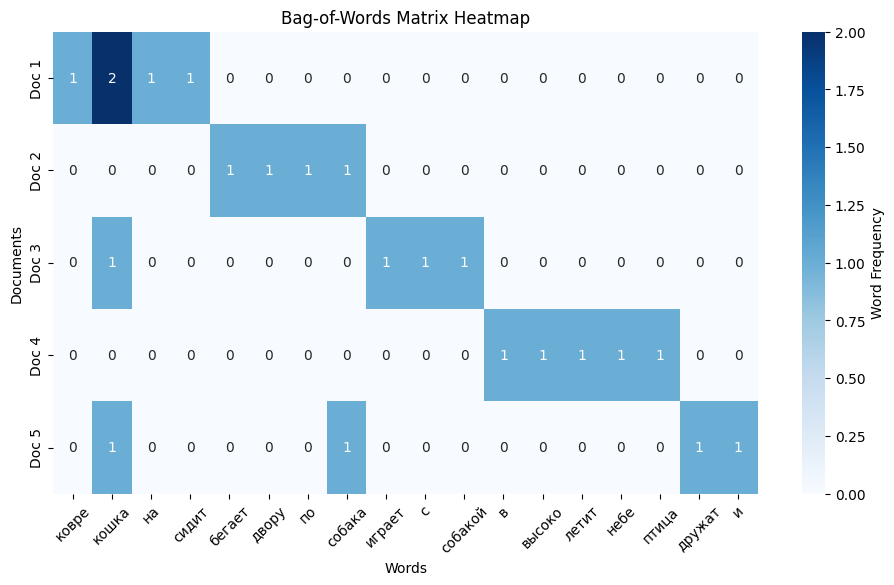

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация
matrix = np.array(dense_vectors)
words = list(dictionary.token2id.keys())
doc_names = [f"Doc {i+1}" for i in range(len(documents))]

print(f"Matrix shape: {matrix.shape}")

plt.figure(figsize=(25, 6))

plt.subplot(1, 2, 1)
sns.heatmap(matrix,
            annot=True,
            fmt='d',
            xticklabels=words,
            yticklabels=doc_names,
            cmap='Blues',
            cbar_kws={'label': 'Word Frequency'})
plt.title('Bag-of-Words Matrix Heatmap')
plt.xticks(rotation=45)
plt.ylabel('Documents')
plt.xlabel('Words')


### TF-IDF

In [ ]:
tfidf_model = TfidfModel(bow_corpus)
tfidf_corpus = tfidf_model[bow_corpus]

print("TF-IDF векторы (индекс_слова: tfidf_вес):")
for i, doc_vec in enumerate(tfidf_corpus, 1):
    print(f"Документ {i}: {[(dictionary[idx], round(score, 3)) for idx, score in doc_vec]}")

TF-IDF векторы (индекс_слова: tfidf_вес):
Документ 1: [('a', np.float64(0.078)), ('about', np.float64(0.163)), ('caveman', np.float64(0.35)), ('conversation', np.float64(0.35)), ('dad', np.float64(0.314)), ('ever', np.float64(0.257)), ('have', np.float64(0.149)), ('infuriating', np.float64(0.35)), ('is', np.float64(0.087)), ('most', np.float64(0.21)), ('my', np.float64(0.149)), ('pointless', np.float64(0.35)), ('the', np.float64(0.056)), ('thing', np.float64(0.236)), ('to', np.float64(0.069)), ('trying', np.float64(0.293)), ('vegetarianism', np.float64(0.226)), ('with', np.float64(0.132))]
Документ 2: [('4', np.float64(0.238)), ('altright', np.float64(0.281)), ('at', np.float64(0.162)), ('israel', np.float64(0.234)), ('latestnews', np.float64(0.369)), ('nativeamerican', np.float64(0.369)), ('newmexico', np.float64(0.369)), ('of', np.float64(0.086)), ('palestine', np.float64(0.256)), ('politics', np.float64(0.309)), ('protesting', np.float64(0.331)), ('rise', np.float64(0.309))]
Докумен

In [ ]:
# Преобразуем TF-IDF в плотную матрицу для визуализации
def tfidf_to_dense(tfidf_corpus, dictionary):
    dense_vectors = []
    for doc in tfidf_corpus:
        dense_vec = [0.0] * len(dictionary)
        for idx, score in doc:
            dense_vec[idx] = score
        dense_vectors.append(dense_vec)
    return dense_vectors

tfidf_dense = tfidf_to_dense(tfidf_corpus, dictionary)
tfidf_matrix = np.array(tfidf_dense)
words = list(dictionary.token2id.keys())
doc_names = [f"Док {i+1}" for i in range(len(tfidf_corpus))]

plt.figure(figsize=(40, 20))

plt.subplot(2, 3, 1)
sns.heatmap(tfidf_matrix,
            annot=True,
            fmt='.3f',
            xticklabels=words,
            yticklabels=doc_names,
            cmap='YlOrRd',
            cbar_kws={'label': 'TF-IDF Вес'})
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
# Получаем исходные TF значения из bow_corpus
tf_dense = bow_to_dense(bow_corpus, dictionary)
tf_matrix = np.array(tf_dense)

# Сравниваем TF и TF-IDF для первого документа
doc_idx = 0
x_pos = np.arange(len(words))
width = 0.35

plt.bar(x_pos - width/2, tf_matrix[doc_idx], width, label='TF', alpha=0.7, color='blue')
plt.bar(x_pos + width/2, tfidf_matrix[doc_idx], width, label='TF-IDF', alpha=0.7, color='red')
plt.xticks(x_pos, words, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7d9ac4175620> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7d9ac4175080> (for post_execute):


KeyboardInterrupt: 

#### **1. TF (Term Frequency) - Частота термина**
```python
TF(t,d) = count(t,d) / total_terms(d)
```
или упрощенно:
```python
TF(t,d) = count(t,d)  # просто количество вхождений
```

#### **2. IDF (Inverse Document Frequency) - Обратная частота документа**
```python
IDF(t) = log( N / (DF(t) + 1) ) + 1
```
Где:
- **N** - общее количество документов
- **DF(t)** - количество документов, содержащих слово t
- **+1** в знаменателе - сглаживание, чтобы не было "околонулевых" значений (smoothing)
- **+1** в конце - для избежания нулевых весов

#### **3. TF-IDF - итоговый вес**
```python
TF-IDF(t,d) = TF(t,d) × IDF(t)
```

**Сравнение разных формул IDF**

| Формула | Редкое слово (DF=1) | Частое слово (DF=100) | Сверхчастое (DF=990) |
|---------|---------------------|----------------------|---------------------|
| `log(N/DF)` | 6.91 | 2.30 | 0.01 |
| `log(N/(DF+1))` | 6.90 | 2.29 | 0.009 |
| `log(N/(DF+1)) + 1` | **7.90** | **3.29** | **1.009** |


### Word2Vec

In [ ]:
# Используем небольшую модель для демонстрации
print("Загрузка предобученной модели Word2Vec...")
w2v_model = api.load("glove-wiki-gigaword-50")  # Маленькая модель

# Функция для получения эмбеддинга документа
def get_doc_embedding(tokens, model):
    word_vectors = []
    for token in tokens:
        try:
            word_vectors.append(model[token])
        except KeyError:
            continue
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Получаем эмбеддинги для документов
doc_embeddings = []
for i, tokens in enumerate(tokenized_docs):
    embedding = get_doc_embedding(tokens, w2v_model)
    doc_embeddings.append(embedding)
    print(f"\nДокумент {i+1}: {documents[i]}")
    print(f"Эмбеддинг (первые 10 значений): {embedding[:10].round(4)}")
    print(f"Размер: {embedding.shape}")

# Косинусная схожесть между документами
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(doc_embeddings)
print("\nМатрица косинусной схожести:")
print("     Д1    Д2    Д3    Д4    Д5")
for i, row in enumerate(similarity_matrix):
    print(f"Д{i+1}  " + "  ".join([f"{x:.3f}" for x in row]))

Загрузка предобученной модели Word2Vec...
[==================================================] 100.0% 66.0/66.0MB downloaded

Документ 1: кошка сидит на ковре кошка
Эмбеддинг (первые 10 значений): [-1.3191  1.5595  0.0702 -0.4633 -0.8065  0.3126  1.2403 -0.6641 -1.1753
 -0.4418]
Размер: (50,)

Документ 2: собака бегает по двору
Эмбеддинг (первые 10 значений): [-1.1564  0.7363 -0.162  -0.0846 -0.9603  0.3709  1.9096  0.0091 -0.388
 -0.8261]
Размер: (50,)

Документ 3: кошка играет с собакой
Эмбеддинг (первые 10 значений): [-1.5624  0.9866  0.1836 -1.0273 -0.8551 -0.0476  1.141  -0.6877 -0.2825
 -0.7102]
Размер: (50,)

Документ 4: птица летит высоко в небе
Эмбеддинг (первые 10 значений): [-1.0499  1.3412 -0.3431 -0.8776 -1.2784  0.1292  1.812  -0.3816 -0.9911
 -0.2818]
Размер: (50,)

Документ 5: собака и кошка дружат
Эмбеддинг (первые 10 значений): [-0.9957  1.3808 -0.3036 -0.7568 -0.9025  0.2521  1.4351 -0.4907 -1.3925
 -0.1646]
Размер: (50,)

Матрица косинусной схожести:
     Д1    Д2  

*Как работает Word2Vec мы разберем на следующей лекции..*

### Домашка

1. Скачать [датасет по ссылке](https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv) (просто запустить строку ниже)

In [ ]:
!wget https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv

--2025-12-24 14:30:04--  https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102826 (100K) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>] 100.42K  --.-KB/s    in 0.02s   

2025-12-24 14:30:04 (5.75 MB/s) - ‘test.csv’ saved [102826/102826]



2. Открыть csv и сохранить текст в переменную (макс. балл == 1)

In [ ]:
import pandas as pd
df = pd.read_csv('test.csv')
text_data = df['text']

3. Извлечь столбец с текстами (макс. балл == 1)

In [ ]:
import pandas as pd
df = pd.read_csv('test.csv')
texts = df['text']

4. Построить Bag-of-Words (макс. балл == 3)

Пример словаря (первые 20 токенов):
{'a': 0, 'about': 1, 'caveman': 2, 'conversation': 3, 'dad': 4, 'ever': 5, 'have': 6, 'infuriating': 7, 'is': 8, 'most': 9, 'my': 10, 'pointless': 11, 'the': 12, 'thing': 13, 'to': 14, 'trying': 15, 'vegetarianism': 16, 'with': 17, '4': 18, 'altright': 19}

BoW представление первых документов:
Документ 1: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]
Документ 2: [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]
Документ 3: [(0, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)]
Документ 4: [(17, 1), (38, 4), (40, 1), (41, 2), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 2)]
Документ 5: [(51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1)]

Топ-20 самых частых слов в корпусе:
      word 

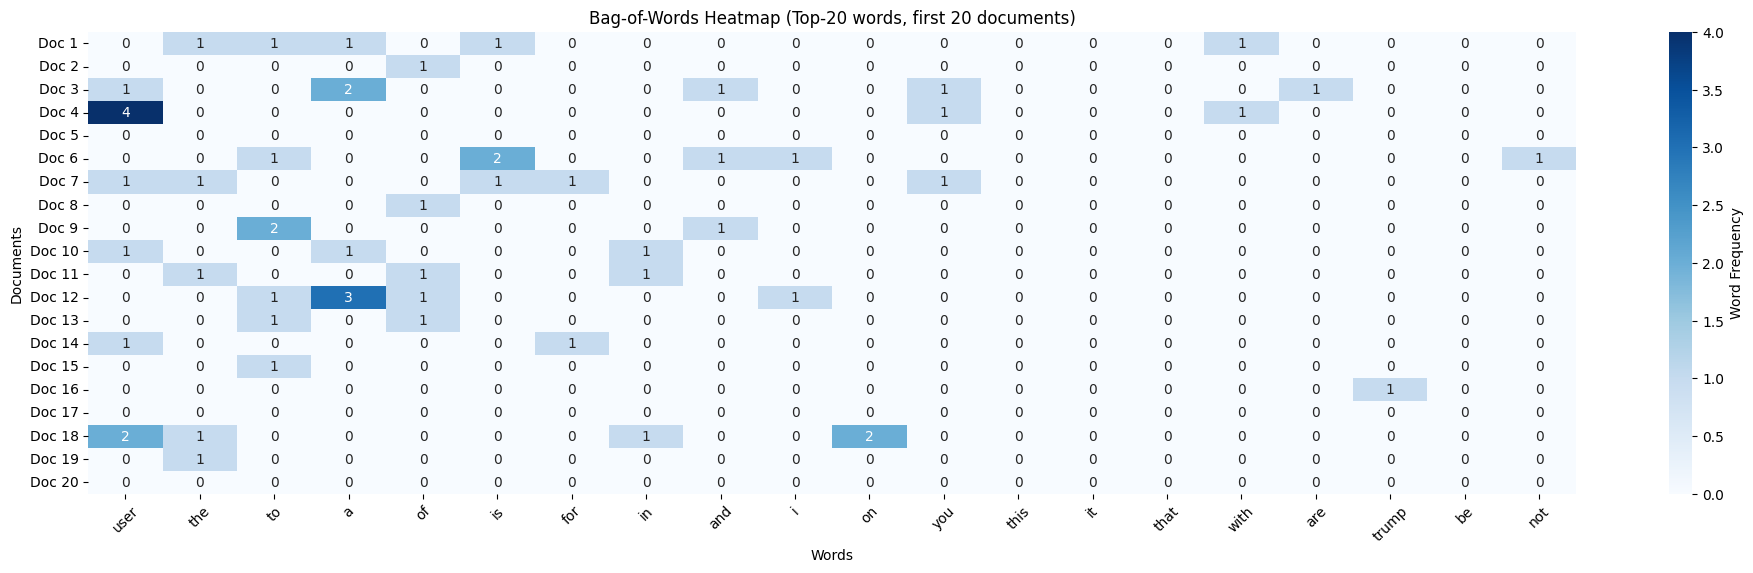


Самые частые слова в корпусе:
user — 570
the — 387
to — 268
a — 227
of — 199
is — 186
for — 176
in — 165
and — 164
i — 135
on — 118
you — 92
this — 80
it — 79
that — 79
with — 71
are — 65
trump — 62
be — 60
not — 59


In [ ]:
!pip install gensim

import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim import corpora
from collections import Counter

# Задача 1.1: Создайте словарь и BoW представление (макс. балл == 2)
# - Приведите тексты к нижнему регистру
# - Удалите знаки препинания
# - Постройте словарь
# - Преобразуйте документы в BoW векторы
# Задача 1.2: Визуализируйте результаты (макс. балл == 1)
# - Создайте таблицу частот слов
# - Постройте heatmap матрицы BoW
# - Найдите самые частые слова в корпусе

# Приводим тексты к нижнему регистру
texts_lower = texts.str.lower()

# Удаляем знаки препинания
texts_clean = texts_lower.str.replace(r"[^\w\s]", "", regex=True)

# Токенизация
tokenized_texts = texts_clean.str.split()

# Построение словаря
dictionary = corpora.Dictionary(tokenized_texts)

print("Пример словаря (первые 20 токенов):")
print(dict(list(dictionary.token2id.items())[:20]))

# Преобразование документов в Bag-of-Words
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_texts]

print("\nBoW представление первых документов:")
for i, doc in enumerate(bow_corpus[:5], 1):
    print(f"Документ {i}: {doc}")

# Преобразование в плотную матрицу
def bow_to_dense(bow_corpus, dictionary):
    dense_vectors = []
    for doc in bow_corpus:
        vector = [0] * len(dictionary)
        for idx, freq in doc:
            vector[idx] = freq
        dense_vectors.append(vector)
    return np.array(dense_vectors)

bow_matrix = bow_to_dense(bow_corpus, dictionary)

# Создаю таблица частот слов
word_frequencies = bow_matrix.sum(axis=0)

freq_df = pd.DataFrame({
    "word": list(dictionary.token2id.keys()),
    "frequency": word_frequencies
}).sort_values(by="frequency", ascending=False)

print("\nТоп-20 самых частых слов в корпусе:")
print(freq_df.head(20))

# Строим heatmap матрицы BoW
# Берем первые 20 документов и 20 самых частых слов
top_words = freq_df.head(20)["word"].tolist()
top_indices = [dictionary.token2id[word] for word in top_words]

heatmap_matrix = bow_matrix[:20, top_indices]
doc_labels = [f"Doc {i+1}" for i in range(heatmap_matrix.shape[0])]

plt.figure(figsize=(24, 6))
sns.heatmap(
    heatmap_matrix,
    annot=True,
    fmt="d",
    xticklabels=top_words,
    yticklabels=doc_labels,
    cmap="Blues",
    cbar_kws={"label": "Word Frequency"}
)
plt.title("Bag-of-Words Heatmap (Top-20 words, first 20 documents)")
plt.xlabel("Words")
plt.ylabel("Documents")
plt.xticks(rotation=45)
plt.show()

# Самые частые слова в корпусе
print("\nСамые частые слова в корпусе:")
for _, row in freq_df.head(20).iterrows():
    print(f"{row['word']} — {row['frequency']}")

5. Построить TF-IDF (макс. балл == 5)

TF-IDF векторы (слово, вес):
Документ 1: [('a', np.float64(0.078)), ('about', np.float64(0.163)), ('caveman', np.float64(0.35)), ('conversation', np.float64(0.35)), ('dad', np.float64(0.314)), ('ever', np.float64(0.257)), ('have', np.float64(0.149)), ('infuriating', np.float64(0.35)), ('is', np.float64(0.087)), ('most', np.float64(0.21)), ('my', np.float64(0.149)), ('pointless', np.float64(0.35)), ('the', np.float64(0.056)), ('thing', np.float64(0.236)), ('to', np.float64(0.069)), ('trying', np.float64(0.293)), ('vegetarianism', np.float64(0.226)), ('with', np.float64(0.132))]
Документ 2: [('4', np.float64(0.238)), ('altright', np.float64(0.281)), ('at', np.float64(0.162)), ('israel', np.float64(0.234)), ('latestnews', np.float64(0.369)), ('nativeamerican', np.float64(0.369)), ('newmexico', np.float64(0.369)), ('of', np.float64(0.086)), ('palestine', np.float64(0.256)), ('politics', np.float64(0.309)), ('protesting', np.float64(0.331)), ('rise', np.float64(0.309))]
Документ 3: [('a', n

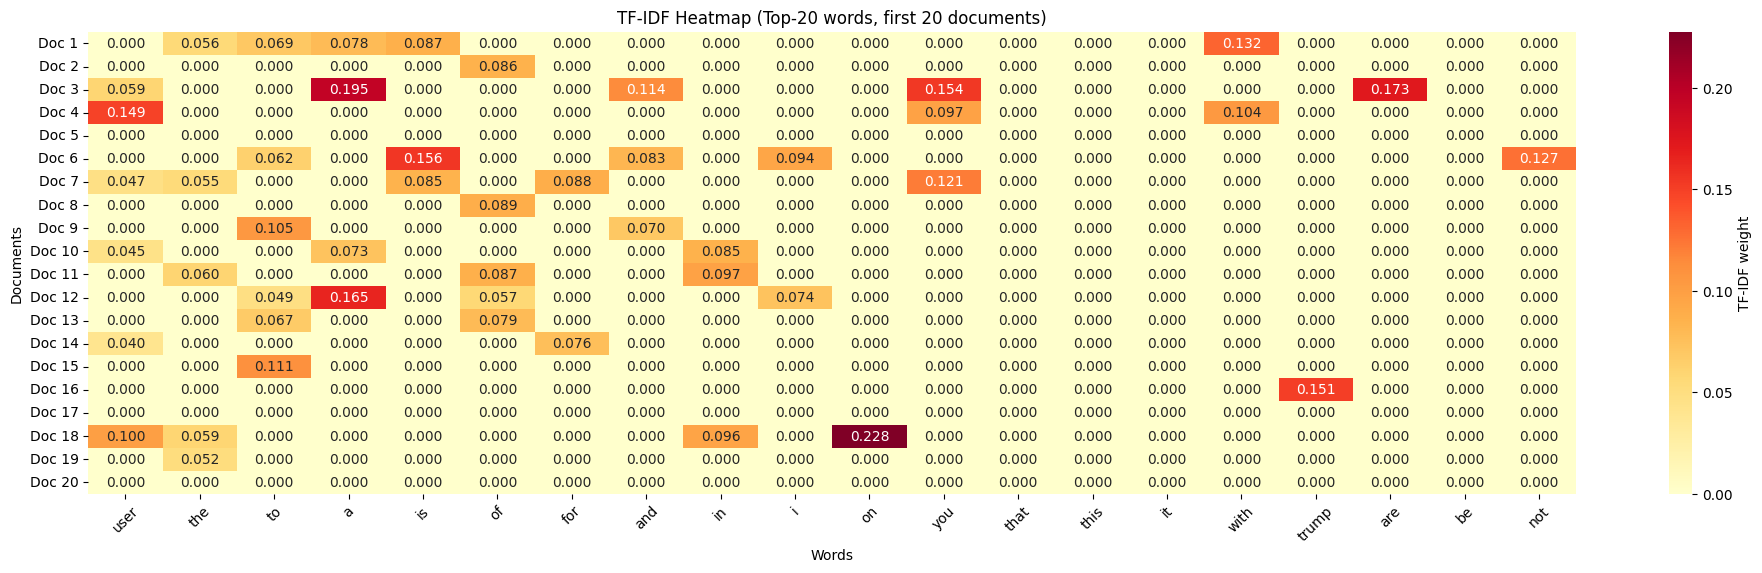

In [ ]:
!pip install gensim

import pandas as pd
import re
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim import corpora
from gensim.models import TfidfModel

# Задача 2.1: Примените TF-IDF к BoW представлению (макс. балл == 2)
# - Используйте TfidfModel из gensim
# - Получите TF-IDF векторы для каждого документа

# Задача 2.2: Проанализируйте веса TF-IDF (макс. балл == 3)
# - Для каждого слова вычислите: (макс. балл == 2)
#   * TF (term frequency) в каждом документе
#   * DF (document frequency) во всем корпусе
#   * IDF (inverse document frequency)
#   * значение TF-IDF
# - Сохраните результат в *.сsv (макс. балл == 1)
# - Прикрепите *.csv в ваш репозиторий

# Приведение текста к нижнему регистру и удаление пунктуации
texts_clean = texts.str.lower().str.replace(r"[^\w\s]", "", regex=True)

# Токенизация
tokenized_texts = texts_clean.str.split()

# Построение словаря
dictionary = corpora.Dictionary(tokenized_texts)

# Построение Bag-of-Words корпуса
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_texts]

# Обучение TF-IDF модели на BoW представлении
tfidf_model = TfidfModel(bow_corpus)

# Получение TF-IDF векторов для каждого документа
tfidf_corpus = tfidf_model[bow_corpus]

print("TF-IDF векторы (слово, вес):")
for i, doc in enumerate(tfidf_corpus[:5], 1):
    print(f"Документ {i}: {[(dictionary[idx], round(score, 3)) for idx, score in doc]}")

# Общее количество документов
N = len(bow_corpus)

# DF - количество документов, в которых встречается слово
df_counts = {dictionary[idx]: 0 for idx in dictionary.keys()}
for doc in bow_corpus:
    for idx, _ in doc:
        df_counts[dictionary[idx]] += 1

# IDF - обратная частота документа
idf_values = {
    word: math.log((N + 1) / (df + 1)) + 1
    for word, df in df_counts.items()
}

# Сбор TF, DF, IDF и TF-IDF для каждого слова в каждом документе
rows = []

for doc_id, doc in enumerate(bow_corpus):
    doc_len = sum(cnt for _, cnt in doc)
    for idx, cnt in doc:
        word = dictionary[idx]
        tf = cnt / doc_len                # TF
        df_val = df_counts[word]          # DF
        idf = idf_values[word]            # IDF
        tfidf = tf * idf                  # TF-IDF

        rows.append({
            "document_id": doc_id,
            "word": word,
            "TF": tf,
            "DF": df_val,
            "IDF": idf,
            "TF_IDF": tfidf
        })

# Создание DataFrame
tfidf_analysis_df = pd.DataFrame(rows)

# Сохранение результатов в CSV
tfidf_analysis_df.to_csv("tfidf_analysis.csv", index=False)

print("\nTF-IDF анализ сохранён в файл tfidf_analysis.csv")

# Преобразование TF-IDF в плотную матрицу
def tfidf_to_dense(tfidf_corpus, dictionary):
    dense_vectors = []
    for doc in tfidf_corpus:
        vector = [0.0] * len(dictionary)
        for idx, score in doc:
            vector[idx] = score
        dense_vectors.append(vector)
    return np.array(dense_vectors)

tfidf_matrix = tfidf_to_dense(tfidf_corpus, dictionary)

# Берём первые 20 документов и 20 самых частых слов
word_frequencies = tfidf_matrix.sum(axis=0)
top_indices = np.argsort(word_frequencies)[::-1][:20]
top_words = [dictionary[i] for i in top_indices]

heatmap_matrix = tfidf_matrix[:20, top_indices]
doc_labels = [f"Doc {i+1}" for i in range(heatmap_matrix.shape[0])]

plt.figure(figsize=(24, 6))
sns.heatmap(
    heatmap_matrix,
    annot=True,
    fmt=".3f",
    xticklabels=top_words,
    yticklabels=doc_labels,
    cmap="YlOrRd",
    cbar_kws={"label": "TF-IDF weight"}
)
plt.title("TF-IDF Heatmap (Top-20 words, first 20 documents)")
plt.xlabel("Words")
plt.ylabel("Documents")
plt.xticks(rotation=45)
plt.show()

##### **Как вычислить компоненты вручную**

```python
def analyze_tfidf_components(bow_corpus, dictionary):
    # Шаг 1: Создаем матрицу TF (term frequency)
    tf_matrix = np.zeros((len(bow_corpus), len(dictionary)))
    for doc_idx, doc in enumerate(bow_corpus):
        for word_idx, freq in doc:
            tf_matrix[doc_idx, word_idx] = freq
    
    # Шаг 2: Вычисляем DF (document frequency)
    df_vector = np.sum(tf_matrix > 0, axis=0)  # Количество документов с каждым словом
    
    # Шаг 3: Вычисляем IDF (inverse document frequency)
    N = len(bow_corpus)  # общее количество документов
    idf_vector = np.log(N / (df_vector + 1)) + 1
    
    # Шаг 4: Вычисляем TF-IDF вручную
    tfidf_manual = tf_matrix * idf_vector
    
    return tf_matrix, df_vector, idf_vector, tfidf_manual
```

6. Произвести сравните

*Эта часть не оценивается, но будет давать доп. баллы на экзамене для тех, кто выполнит её*

Наиболее часто втречающиеся слова для сравнения: ['user', 'the', 'for', 'and']


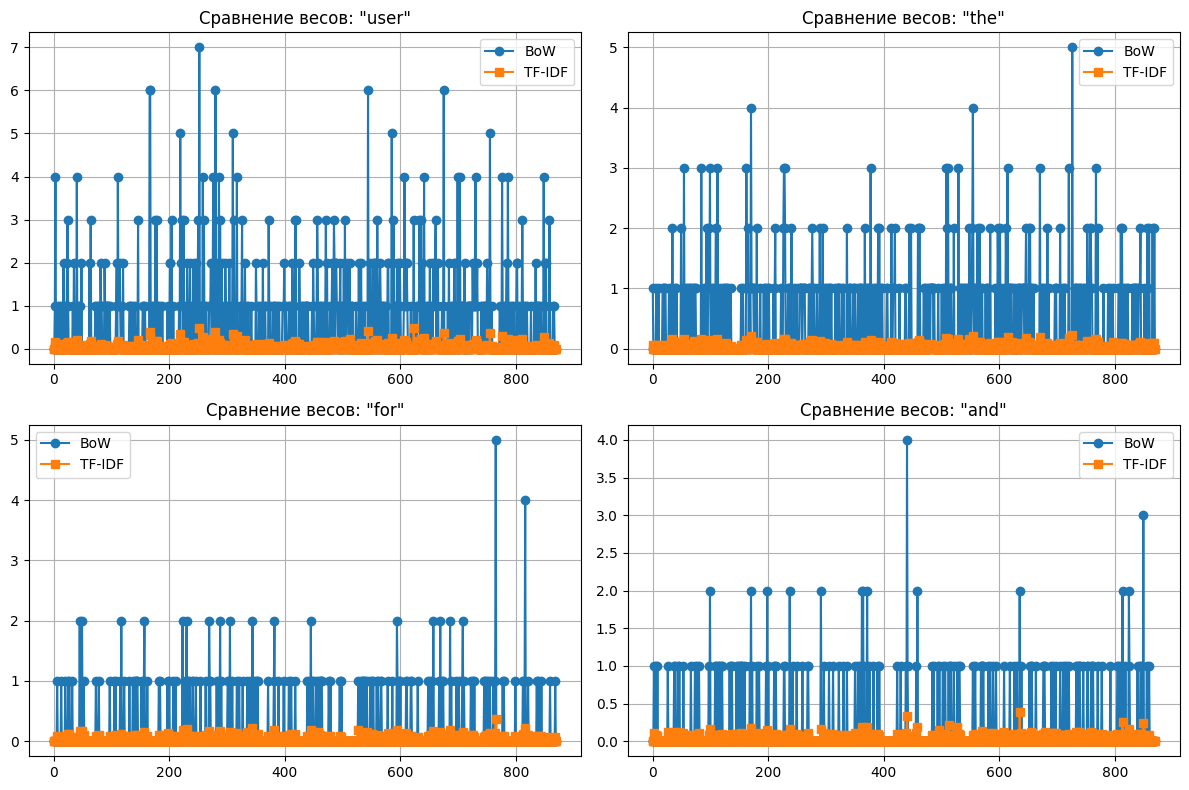

In [18]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from gensim import corpora, models
# Сравните BoW и TF-IDF для конкретных слов
# - Выберите 3-4 слова из датасета (выберите слова, характерные для датасета)
# - Постройте графики сравнения их весов в BoW и TF-IDF

# Загрузка и подготовка данных
df = pd.read_csv('test.csv')
texts = df['text'].tolist()

# Приведение к нижнему регистру и удаление пунктуации
processed_texts = [re.sub(r'[^\w\s]', '', str(text).lower()).split() for text in texts]

# создание модели
dictionary = corpora.Dictionary(processed_texts)
bow_corpus = [dictionary.doc2bow(text) for text in processed_texts]
tfidf_model = models.TfidfModel(bow_corpus)
tfidf_corpus = tfidf_model[bow_corpus]

# Автоматический выбор 4 частых слов
from collections import Counter
word_freq = Counter()
for text in processed_texts:
    word_freq.update(text)

common_words_to_compare = [word for word, freq in word_freq.most_common(10) if len(word) > 2][:4]

# Визуализация сравнения
plt.figure(figsize=(12, 8))
for i, word in enumerate(common_words_to_compare):
    if word in dictionary.token2id:
        word_id = dictionary.token2id[word]

        bow_weights = []
        tfidf_weights = []

        for doc_id in range(len(processed_texts)):
            bow_dict = dict(bow_corpus[doc_id])
            tfidf_dict = dict(tfidf_corpus[doc_id])

            bow_weights.append(bow_dict.get(word_id, 0))
            tfidf_weights.append(tfidf_dict.get(word_id, 0))

        plt.subplot(2, 2, i+1)
        plt.plot(bow_weights, label='BoW', marker='o')
        plt.plot(tfidf_weights, label='TF-IDF', marker='s')
        plt.title(f'Сравнение весов: "{word}"')
        plt.legend()
        plt.grid(True)
print(f"Наиболее часто втречающиеся слова для сравнения: {common_words_to_compare}")
plt.tight_layout()
plt.show()


##### **Как построить сравнительный график**
```python
def compare_bow_tfidf(words, bow_dense, tfidf_dense, dictionary):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    for i, word in enumerate(words):
        row, col = i // 2, i % 2
        word_id = dictionary.token2id[word]
        
        # Веса для этого слова во всех документах
        bow_weights = [doc[word_id] for doc in bow_dense]
        tfidf_weights = [doc[word_id] for doc in tfidf_dense]
        
        x = range(len(bow_dense))
        axes[row, col].bar(x, bow_weights, alpha=0.7, label='BoW', width=0.4)
        axes[row, col].bar([p + 0.4 for p in x], tfidf_weights, alpha=0.7, label='TF-IDF', width=0.4)
        axes[row, col].set_title(f'Сравнение весов: "{word}"')
        axes[row, col].legend()
        axes[row, col].set_xticks([p + 0.2 for p in x])
        axes[row, col].set_xticklabels([f'Док {i+1}' for i in x])
    
    plt.tight_layout()
    plt.show()
```